In [1]:
%%bash
apt install -y imagemagick
[ ! -f flower_photos_300x200_small_train_test2.zip ]&& wget https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip

rm -rf __MACOSX
rm -rf flowers
unzip -q flower_photos_300x200_small_train_test2.zip
mv flower_photos_300x200_small_train_test2 flowers

cd flowers
# files=$(find |grep "\.jpg$\|\.png$")
# for i in $files; do
#     # convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -colorspace Gray    ${i%.*}.png
#     convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -define png:color-type=2   ${i%.*}.png

#     # identify ${i%.*}.png
#     rm -f $i
# done

find .|grep .DS_Store|xargs rm -f
find .|head -n 10

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsf



--2020-12-03 12:39:40--  https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16601659 (16M) [application/zip]
Saving to: ‘flower_photos_300x200_small_train_test2.zip’

     0K .......... .......... .......... .......... ..........  0% 58.3M 0s
    50K .......... .......... .......... .......... ..........  0% 36.1M 0s
   100K .......... .......... .......... .......... ..........  0% 29.2M 0s
   150K .......... .......... .......... .......... ..........  1% 39.4M 0s
   200K .......... .......... .......... .......... ..........  1% 51.0M 0s
   250K .......... .......... .......... .......... ..........  1% 42.4M 0s
   300K .......... .......... .......... ...

In [2]:
from os import listdir
from os.path import isfile, join
import cv2
def getFolder(thePath,isFile=True):
  return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]

def convert(thePath,to_w,to_h):
  print(thePath) # 향후 OpenCV로 이미지 변환하는 부분
  img=cv2.imread(thePath)
  img=cv2.resize(img,(to_w,to_h))
  cv2.imwrite(thePath,img)

def convertAll(tPath,to_w,to_h):
  for folder in getFolder(tPath,False):
    print('-',folder)
    convertAll(join(tPath,folder),to_w,to_h)
  for files in getFolder(tPath,True):
    convert(join(tPath,files),to_w,to_h)
w=300
h=200
convertAll('/content/flowers',w,h)


- test
- tulip
/content/flowers/test/tulip/8723767533_9145dec4bd_n.jpg
/content/flowers/test/tulip/8717900362_2aa508e9e5.jpg
/content/flowers/test/tulip/13530690445_9f1f5cf43a_n.jpg
/content/flowers/test/tulip/13514136074_ab1b827e4f.jpg
/content/flowers/test/tulip/12024561754_ce9667e4dc_n.jpg
/content/flowers/test/tulip/13910737760_c71c8b6ff2.jpg
/content/flowers/test/tulip/8838347159_746d14e6c1_m.jpg
/content/flowers/test/tulip/13562271714_d534531374.jpg
/content/flowers/test/tulip/13472393854_b2530f7029_n.jpg
/content/flowers/test/tulip/9870557734_88eb3b9e3b_n.jpg
/content/flowers/test/tulip/13910131718_731353d84c_n.jpg
/content/flowers/test/tulip/8768645961_8f1e097170_n.jpg
/content/flowers/test/tulip/14053292975_fdc1093571_n.jpg
/content/flowers/test/tulip/13910028149_6c9d5485ef.jpg
/content/flowers/test/tulip/13910719110_1b21d1fc81.jpg
/content/flowers/test/tulip/13529687904_3d60abb479_n.jpg
/content/flowers/test/tulip/13513851673_9d813dc7b0.jpg
/content/flowers/test/tulip/1202504

In [3]:
!identify /content/flowers/train/daisy/4286053334_a75541f20b_m.jpg



/content/flowers/train/daisy/4286053334_a75541f20b_m.jpg JPEG 300x200 300x200+0+0 8-bit sRGB 16.3KB 0.000u 0:00.000


In [4]:
# getFolder('/content/flowers/',False) # folder list
# getFolder('/content/flowers/test/daisy',True) # file list


In [5]:
# import os
# def convert(thePath,to_w,to_h):
#   print(thePath) # 향후 OpenCV로 이미지 변환하는 부분
#   img=cv2.imread(thePath)
#   img=cv2.resize(img,(to_w,to_h))
#   cv2.imwrite(thePath,img)

# img_list=[i for i in os.walk('/content/flowers')]

# for t in img_list:
#   path=t[0]
#   for f in t[2]:
#     print(join(path,f))
#     convert(join(path,f),400,300)



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator()

In [7]:
# help(datagen.flow_from_directory)
train_data=datagen.flow_from_directory(
    '/content/flowers/train',
    target_size=(h, w),
    batch_size=32,
    class_mode="categorical"
)
test_data=datagen.flow_from_directory(
    '/content/flowers/test',
    target_size=(h, w),
    batch_size=32,
    class_mode="categorical"
)

Found 165 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


In [8]:
# dir(train_data)
len(set(train_data.classes))

2

In [9]:
train_data.classes[0]

0

In [10]:
train_data.filepaths[0]

'/content/flowers/train/daisy/105806915_a9c13e2106_n.jpg'

In [11]:
train_data.image_shape

(200, 300, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


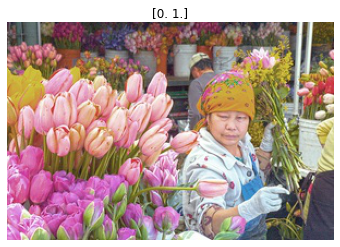

In [35]:
import matplotlib.pyplot as plt

images,labels=train_data.next()
# images[0]/255
plt.axis(False)
plt.title(labels[0])
plt.imshow(images[0]/255)


In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(h,w, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 209024)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# dir(model)
#model.fit(train_images, train_labels, epochs=100,callbacks=[tensorboard_callback])
model.fit_generator(train_data, 
                    validation_data=test_data, 
                    validation_steps=8,
                    epochs=100
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
6/6 [==============================] - 1s 146ms/step - loss: 1135.0739 - accuracy: 0.4788 - val_loss: 70.9662 - val_accuracy: 0.4857
Epoch 2/100
6/6 [==============================] - 0s 72ms/step - loss: 20.8331 - accuracy: 0.5333
Epoch 3/100
6/6 [==============================] - 0s 68ms/step - loss: 0.7577 - accuracy: 0.8242
Epoch 4/100
6/6 [==============================] - 0s 79ms/step - loss: 0.2301 - accuracy: 0.8970
Epoch 5/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0547 - accuracy: 0.9818
Epoch 6/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0551 - accuracy: 0.9758
Epoch 7/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0423 - accuracy: 0.9758
Epoch 8/100
6/6 [==============================] - 0s 79ms/step - loss: 0.1479 - accuracy: 0.9818
Epoch 9/100
6/6 [==============================] - 0s 65ms/step - loss: 0.3510 - accuracy: 0

In [17]:
# score = model.evaluate(test_images, test_labels, verbose=0)
score = model.evaluate_generator(test_data,steps=60)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.004023313522339
Test accuracy: 0.6000000238418579


In [18]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [19]:

filename = take_photo()
img=plt.imread(filename)


<IPython.core.display.Javascript object>

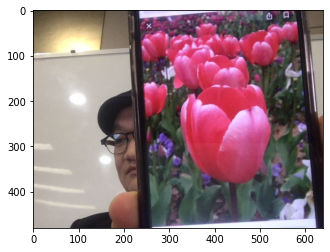

In [20]:
plt.imshow(img)

In [30]:
# image w,h 맞추고
import cv2
img=cv2.imread('/content/flowers/train/daisy/4286053334_a75541f20b_m.jpg')
img2=cv2.resize(img,(h,w))
# img2.shape

# input shape 맞춰야...  n,h,w,c
                     # 1     3
x=img2.reshape( (1,h,w,3 )) 

# Predict
np.argmax(model.predict(x), axis=-1)

array([0])

In [37]:
# image w,h 맞추고
import cv2
def predict_image():
  filename = take_photo()
  img=plt.imread(filename)
  img2=cv2.resize(img,(h,w))
  x=img2.reshape( (1,h,w,3 )) 
  plt.imshow(img)
  if np.argmax(model.predict(x), axis=-1) == 0 :
    return "Daisy"
  else:
    return "Tulip"  

<IPython.core.display.Javascript object>

'Tulip'

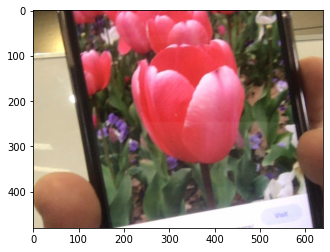

In [38]:
predict_image()